In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import re

#Study files
Yelp_Open_Dataset = "Data/cleaned_reviews.csv"

Yelp_df =pd.read_csv(Yelp_Open_Dataset)

In [3]:
#Can we detect any anomalies in product sales, such as sudden spikes in specific items?
Yelp_df.head()

,coffee_shop_name,full_review_text,star_rating,star_rating_clean
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atmo...,5.0 star rating,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambian...",4.0 star rating,4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots i...,4.0 star rating,4.0
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice s...,2.0 star rating,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within t...,4.0 star rating,4.0


In [4]:
#How many shops in this dataset
shop_name =Yelp_df["coffee_shop_name"].nunique()
print(shop_name)

79


In [5]:
#overall star reviews
shop_ratings = Yelp_df.groupby('coffee_shop_name')['star_rating_clean'].mean()
print(shop_ratings)

coffee_shop_name
Altaâs Cafe                   3.930000
Andersonâs Coffee Company     4.620000
Apanas Coffee & Beer            4.550847
Arturoâs Underground Cafe     4.300000
Bennu Coffee                    4.130000
                                  ...   
Thunderbird Coffee              3.970000
Trianon Coffee                  4.020408
Tuscany At 360                  3.818182
Venezia Italian Gelato          4.810000
Vintage Heart Coffee            4.170000
Name: star_rating_clean, Length: 79, dtype: float64


In [19]:
#How many five star reviews
stars =Yelp_df["star_rating"].unique()

star_rating = Yelp_df["star_rating_clean"].value_counts()
#print(star_rating)
#count_5_star = Yelp_df['star_rating_clean'].value_counts().get(5.0)
five_star_reviews = Yelp_df[Yelp_df["star_rating_clean"] == 5]
#five_star_reviews.head()
five_star_counts = five_star_reviews.groupby('coffee_shop_name')['star_rating_clean'].count()
five_star_counts.nlargest(5)

coffee_shop_name
Houndstooth Coffee              91
Venezia Italian Gelato          88
Apanas Coffee & Beer            84
Andersonâs Coffee Company     77
Epoch Coffee                    75
Name: star_rating_clean, dtype: int64

D:\Bootcamp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Bootcamp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


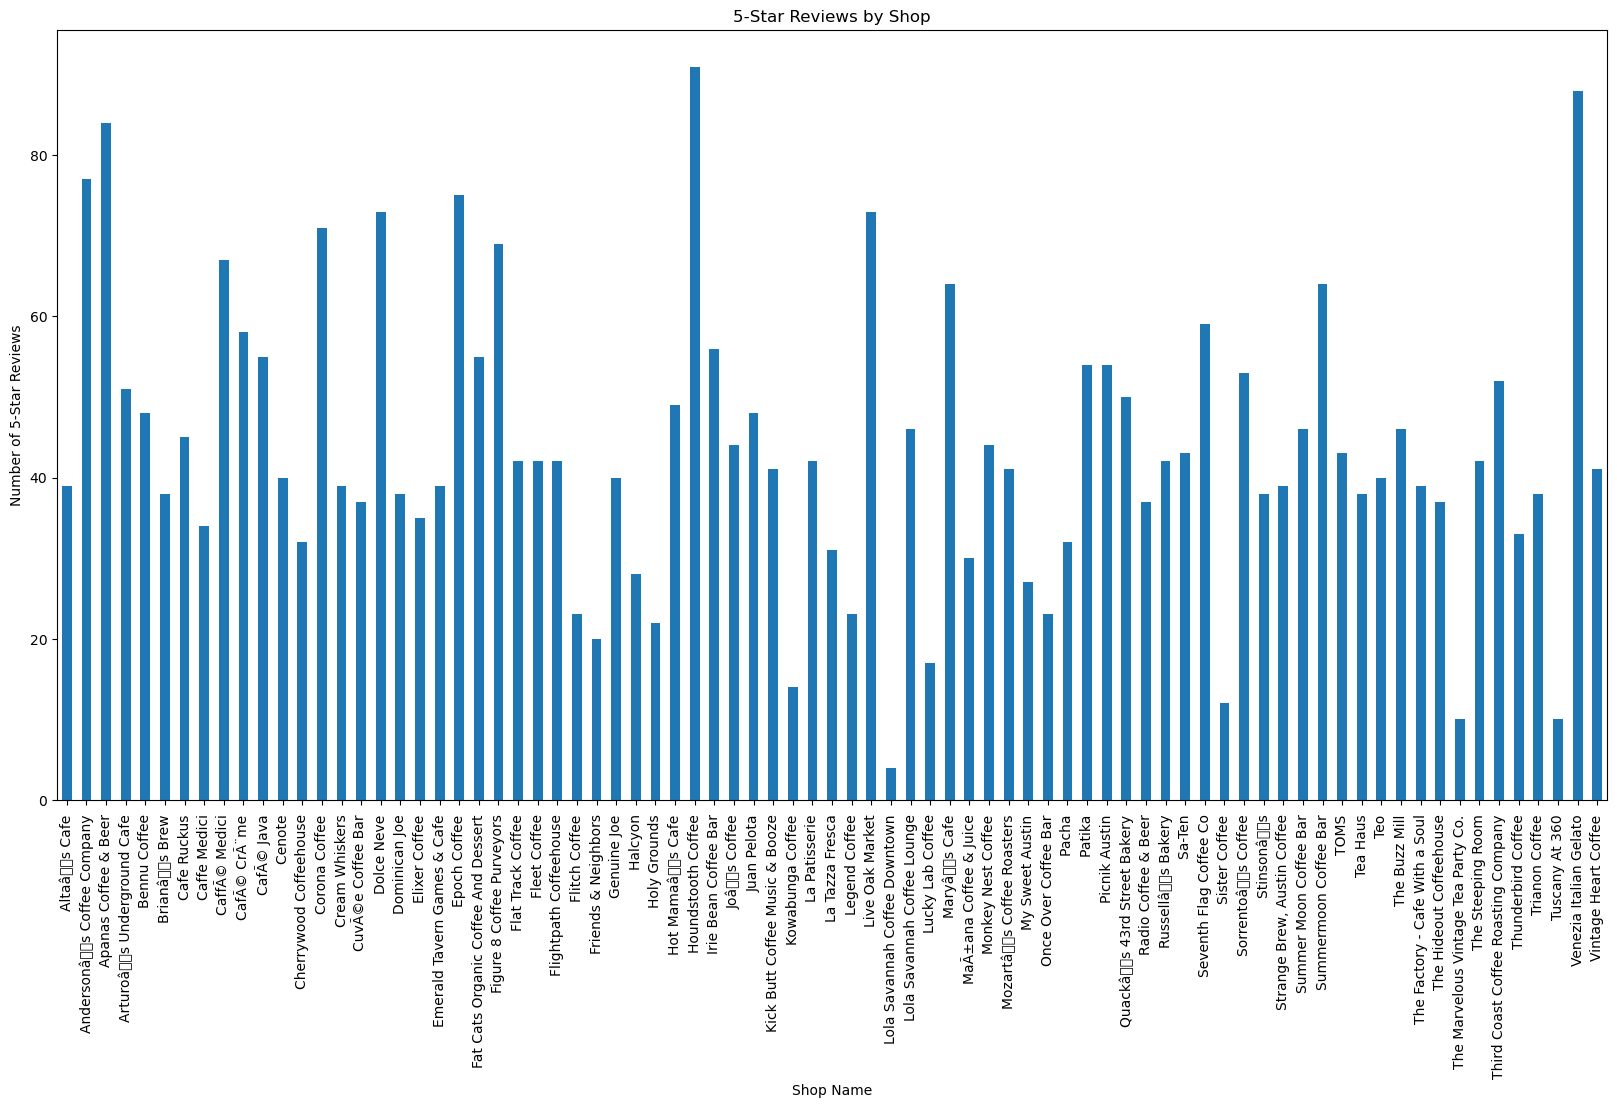

In [20]:
# Use star_rating and coffee_shop_name to create a bar chart  
five_star_counts.plot(kind='bar',figsize=(20, 10))
plt.xlabel('Shop Name')
plt.ylabel('Number of 5-Star Reviews')
plt.title('5-Star Reviews by Shop')
plt.show()

In [8]:
print(five_star_reviews.columns)
five_star_reviews.head()

Index(['coffee_shop_name', 'full_review_text', 'star_rating',
       'star_rating_clean'],
      dtype='object')


,coffee_shop_name,full_review_text,star_rating,star_rating_clean
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atmo...,5.0 star rating,5.0
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins love this place! 5 stars...,5.0 star rating,5.0
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins this place has been sho...,5.0 star rating,5.0
13,The Factory - Cafe With a Soul,12/5/2016 this is such a cute little cafe! i'v...,5.0 star rating,5.0
14,The Factory - Cafe With a Soul,11/13/2016 beautiful eccentric coffee shop wit...,5.0 star rating,5.0


<Figure size 1000x600 with 0 Axes>

D:\Bootcamp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Bootcamp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


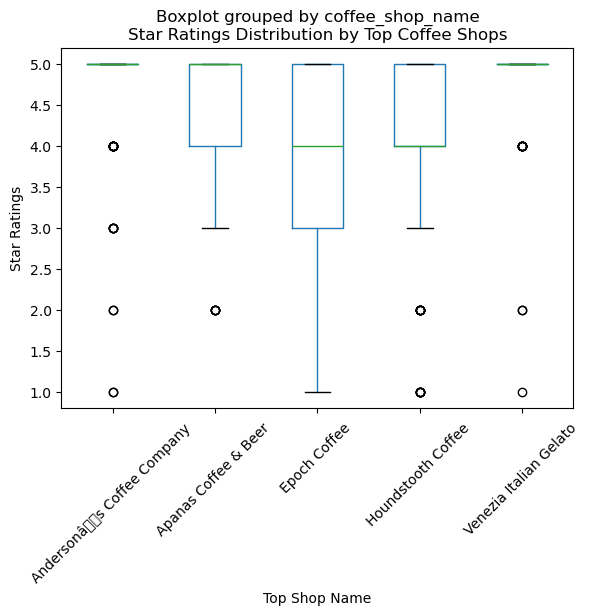

In [13]:
five_star_counts = Yelp_df[Yelp_df['star_rating_clean'] == 5].groupby('coffee_shop_name')['star_rating_clean'].count().reset_index()
five_star_counts.columns = ['coffee_shop_name', 'five_star_count']

top_shops = five_star_counts.nlargest(5, 'five_star_count')['coffee_shop_name'].tolist()
top_shop_reviews = Yelp_df[Yelp_df['coffee_shop_name'].isin(top_shops)]

plt.figure(figsize=(10, 6))
top_shop_reviews.boxplot(column='star_rating_clean', by='coffee_shop_name', grid=False)
plt.xlabel('Top Shop Name')
plt.ylabel('Star Ratings')
plt.title('Star Ratings Distribution by Top Coffee Shops')
plt.xticks(rotation=45)
plt.show()

In [84]:
#Use star_rating to isolate the 5 star data, then search for key words
def find_keywords(text, keywords):
    found = [word for word in keywords if word in text.lower()]
    return found if found else None

#Use star_rating to isolate the 1 star data, then seatch for key words

In [85]:
#specific items trend by key words and data in full_review_text

In [129]:
#Look at date

def extract_date(text):
    match = re.search(r'\d{1,2}/\d{1,2}/\d{4}', text)
    return match.group(0) if match else None
Yelp_df['review_date'] = Yelp_df['full_review_text'].apply(extract_date)

Yelp_df

,coffee_shop_name,full_review_text,star_rating,star_rating_clean,date,review_date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atmo...,5.0 star rating,5.0,NaT,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambian...",4.0 star rating,4.0,NaT,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots i...,4.0 star rating,4.0,NaT,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice s...,2.0 star rating,2.0,NaT,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in they are located within t...,4.0 star rating,4.0,NaT,12/3/2016
...,...,...,...,...,...,...
6910,The Steeping Room,2/19/2015 i actually step into this restaurant...,4.0 star rating,4.0,NaT,2/19/2015
6911,The Steeping Room,"1/21/2016 ok, the steeping room is awesome. ho...",5.0 star rating,5.0,NaT,1/21/2016
6912,The Steeping Room,"4/30/2015 loved coming here for tea, and the a...",4.0 star rating,4.0,NaT,4/30/2015
6913,The Steeping Room,8/2/2015 the food is just average. the booths ...,3.0 star rating,3.0,NaT,8/2/2015


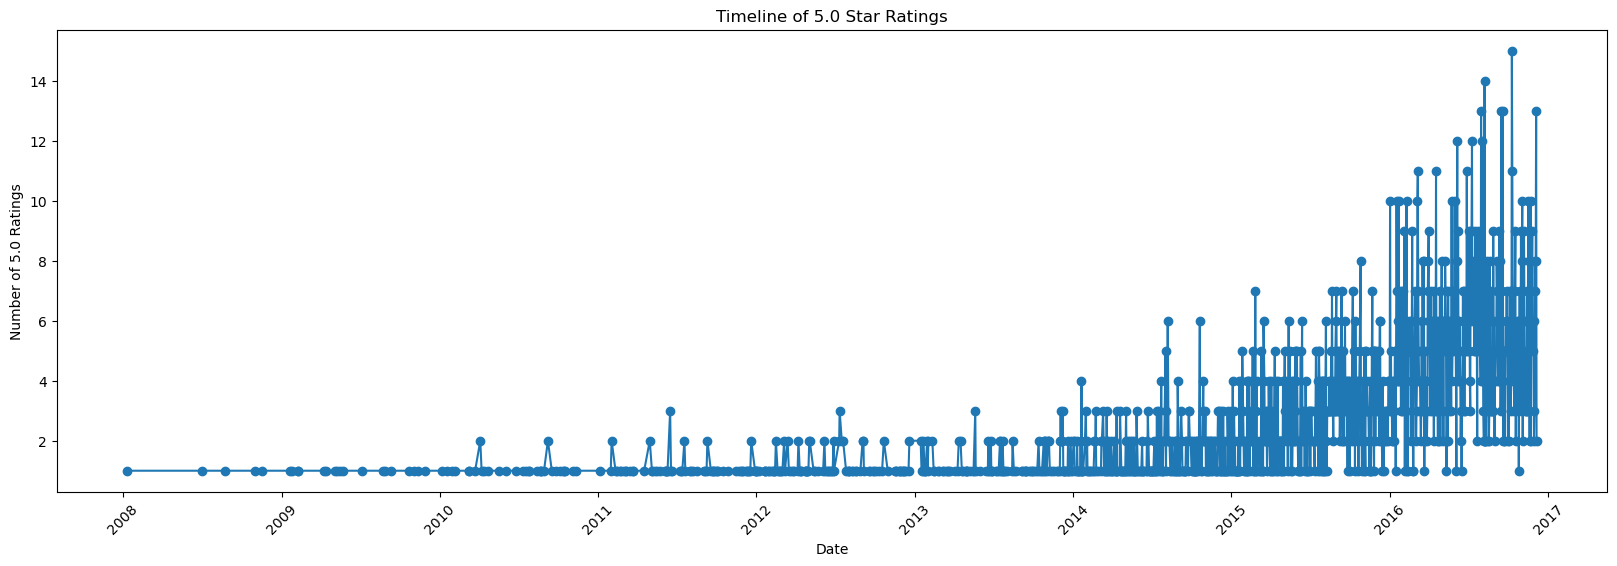

In [142]:
#Use the review_date and 5.0 in star_rating_clean to create a time line to show if there are any spikes in higher ratings
five_star_reviews = Yelp_df[Yelp_df["star_rating_clean"] == 5]
rating_counts = five_star_reviews.groupby('review_date').size().reset_index(name='count')

plt.figure(figsize=(20, 6))
plt.plot(rating_counts['review_date'], rating_counts['count'], marker='o')
plt.title('Timeline of 5.0 Star Ratings')
plt.xlabel('Date')
plt.ylabel('Number of 5.0 Ratings')
plt.xticks(rotation=45)
plt.show()


Monthly Counts:
month
January      256
February     239
March        261
April        252
May          305
June         265
July         352
August       326
September    327
October      334
November     313
December     216
Name: month_year, dtype: int64


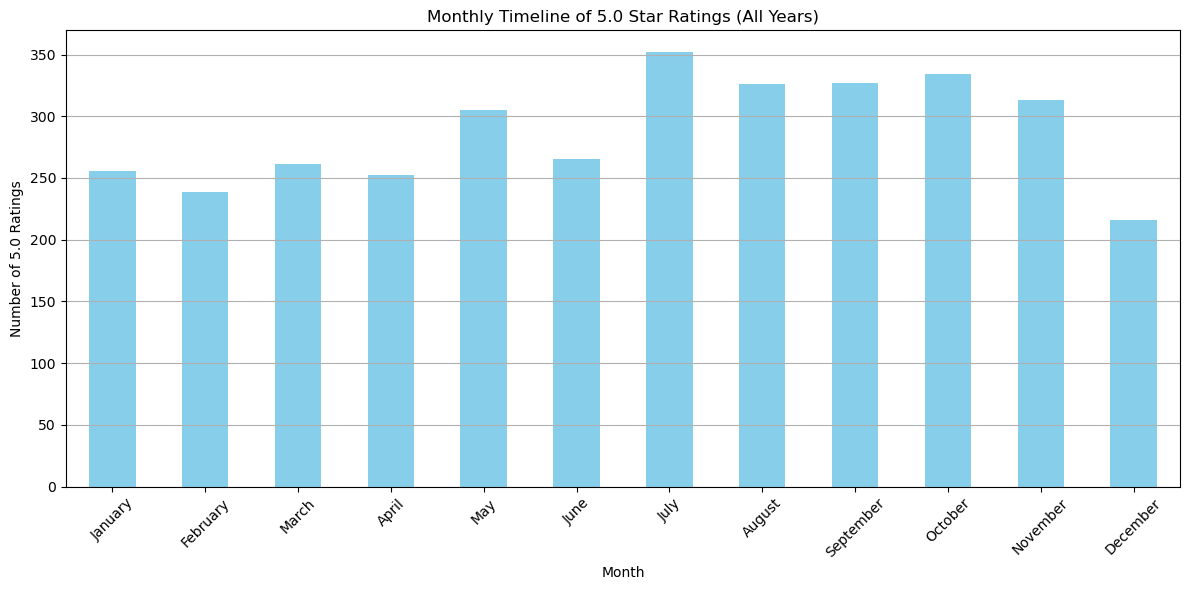

In [152]:
#change to show x as months of the year to read it better
#five_star_reviews = Yelp_df[Yelp_df["star_rating_clean"] == 5]
#five_star_reviews.loc[:, 'month_year'] = five_star_reviews['review_date'].dt.to_period('M')

five_star_reviews.loc[:,'month'] = five_star_reviews['month_year'].dt.start_time.dt.month_name()
monthly_counts = five_star_reviews.groupby('month')['month_year'].count().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
).fillna(0)

print("\nMonthly Counts:")
print(monthly_counts)

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Monthly Timeline of 5.0 Star Ratings (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of 5.0 Ratings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
